In [1]:
%%javascript
function toggler(){
    if(window.already_toggling){
        // Don't add multiple buttons.
        return 0
    }
    let btn = $('.input').append('<button>Toggle Code</button>')
        .children('button');
    btn.on('click', function(e){
        let tgt = e.currentTarget;
        $(tgt).parent().children('.inner_cell').toggle()
    })
    window.already_toggling = true;
}
// Since javascript cells are executed as soon as we load
// the notebook (if it's trusted), and this cell might be at the
// top of the notebook (so is executed first), we need to
// allow time for all of the other code cells to load before
// running. Let's give it 5 seconds.

setTimeout(toggler, 5000);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import json
import sqlite3
import re
import requests
import pandas as pd
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
from numpy.testing import assert_equal
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import utils

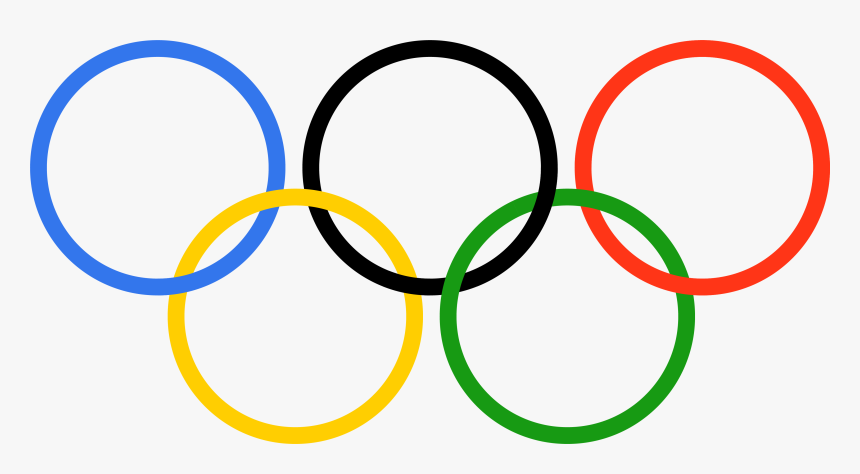

# <center>Summer Olympics the Evolution: Going Strong Since 1896</center>


# Executive Summary

The Olympics has been around for more than a century, thus there is a multitude of data analyses and related literature available on the open web. The hype and support to this highly anticipated sports festival inspired the researchers to explore the Olympics data from 1896 and deep dive into its specific aspects -- hosting, participating countries, teams, athletes, sporting events, and the economic factors affecting the performance of the participants. As of the completion of this paper, it can be assumed that this would be one of the first reports that included and appended the data and insights on the Tokyo 2020/21 Olympics. 

The data segmented into six tables in the Olympics SQL database were collected and created from scraping the Olympics official website and the Olympics Wikipedia pages. In order to analyze the data and to generate meaningful insights, several processes were performed-- data cleaning, exploration, analysis, and visualization. Supplementary sources were also utilized to verify or make sense of the key results discussed in section VI: 

-	Greece as the Olympics Games country of origin was likely the main reason that Europe totaled 16 over 29 hosting bids won.
-	The economic growth and superiority of a country were major influences in winning the Olympics hosting bid, e.g., Seoul, Beijing, and Tokyo as the only Asian countries hosted, and the USA for the most hosting bids.
-	The USA and China as powerful countries with high economic resources lead the ranking of the most gold medals won. An interesting contrast observed was the correlation of the wider wealth gap to better Olympics performance.
-	An overall upward trend has been observed in the number of participating countries, teams, athletes, and sporting events. A few dips or downward trends were attributed to several boycotts, public health concerns, and other political disruptions. 
-	The participation of women athletes has also seen significant progress and led to a 50-50 male-to-female split in the Tokyo 2020 Olympics.

The team agreed that further exploration is necessary to acquire actionable insights and recommendations. The way forward is to dig deeper into the following areas of interest that came to light during the initial data exploration: 1) the econometric analysis, specifically the correlations of the socio-economic indicators to the athletes’ performance; 2) the economic impacts of the Olympics to the host countries, and the probability of middle economies to win the hosting bids; 3) the criteria of eligibility and selection of Olympics sports, and the likelihood of e-games to qualify as an Olympic sport, and lastly; 4) the possible relationship between gender plus physical features and Olympics winning chances.


# I. Introduction

The modern Summer Olympic games started in 1896 in Athens, Greece with 241 athletes, 14 teams and 43 sporting events in 9 sports categories. It has grown through the past century every four (4) years since inception and as of 2020, it now has 11,090 athletes in 339 sporting events. 

More than a quadrennial international athletic contest, the Olympics is a venue in which the world will understand global history. These include geopolitical shifts, the changes in the values of society, and gender inclusion.

With vast evolution of the Summer Olympics through the years in 29 different year-events from 1896 to 2020, the researchers aim to tackle different aspects of the Olympic Games and how it has changed. Areas of focus include the following: hosting location, teams, sporting events, participants and game winners.

The modern Olympic games took inspiration from ancient Greece where north of the first 250 years are held in the sanctuary of Olympia. Some ancient Olympic games include the older version of the following modern-day sports: boxing, chariot racing, running, and wrestling, among others[[1]](https://olympics.com/ioc/ancient-olympic-games).


# II. Motivation & Problem Statement


## Motivation

There are subtle changes every four years when the Summer Olympic Games are held, such as new additions in terms of sports, teams, participants and winners. With this, the researchers aim to detail the key changes through exploratory data analysis.  This will include the visualization and explanation of the change in trends of the various factors over the years which will help to predict the information of future Olympic Games.

The focus areas of the study are:

- Hosting Year & Location
- Participating teams 
- Sporting events
- Participating athletes
- Winning Countries and factors that affect winning

With the 2020 Olympics concluding on August 8, the researchers found it relevant to do an analysis on how the Summer Olympics has changed through the years.

## Problem Statement

Considering the motivation above, the researchers have defined the problem statement as “How has the Summer Olympic Games evolved with its 29 iterations from 1896 to 2020?” 

The researchers also aim to do a detailed analysis to answer the following questions:
- Where was the Olympics held in terms of countries and continents?
- What is the progression of participating teams and countries in terms of count?
- What are the trends of the sporting events since 1896 and what are the recently added sports? 
- What is the progression of participating athletes in terms of count?
- Which countries win the most and what factors contribute to their victory?


# III. Methodology


### Data Collection

The very first step of any type of analysis, whether it is technical or non-technical, is Data Collection. In this lab, the researchers explored API and web scraping to gather data from the two main sources: Wikipedia and  https://olympics.com/.

The researchers extracted Olympics data from 1896 up until 2020. Information collected includes host country, opening and closing dates, number of athletes, types of events, and top 10 winners. The researchers also gathered GDP data in 2020 from Wikipedia. 

BeautifulSoup, Python's canonical tool for efficiently and cleanly navigating and parsing HTML was implemented. Moreover, the researchers applied web crawling through multiple web Wikipedia pages. 


### Cleaning and Pre-processing

The data obtained were first cleaned and transformed into data frames. There were 6 tables in total. Each table and its schema were described in Tables 1-6. Finally, the tables were saved into a database.

The Olympics SQL database contains 5 tables namely OLYMPICS,  GDP, INFO, WINNERS, and SPORTS:
1. The <b>OLYMPICS</b> table contains the historic and basic data from the summer Olympics since 1896.
2. The <b>GDP</b> table contains the GDP of each countries in 2020 based on the United Nations data.
3. The <b>INFO</b> table contains basic and general information about the summer Olympics.
4. The <b>WINNERS</b> table contains information on the winnings of each team or country and how many medals were won.
5. The <b>SPORTS</b> table contains information about the sporting events that is included in the summer Olympics since 1896.
6. The <b>PARTICIPANTS</b> table contains information on the number of participants sent by each country.

<center><b>Table #1. OLYMPICS Table Dictionary.</b></center>
<center>Snippet of the OLYMPICS table fromt he Olympics SQL database</center>


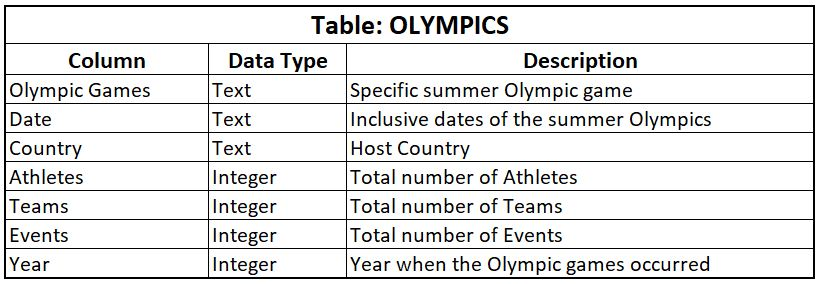

<center><b>Table #2. GDP Table Dictionary.</b></center>
<center>Snippet of the GDP table fromt he Olympics SQL database</center>


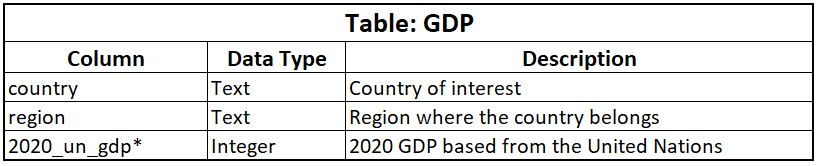

<center><b>Table #3. INFO Table Dictionary.</b></center>
<center>Snippet of the INFO table fromt he Olympics SQL database</center>


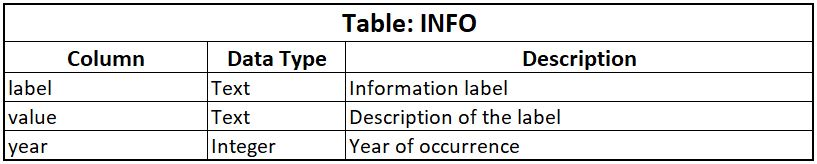

<center><b>Table #4. WINNERS Table Dictionary.</b></center>
<center>Snippet of the WINNERS table fromt he Olympics SQL database</center>


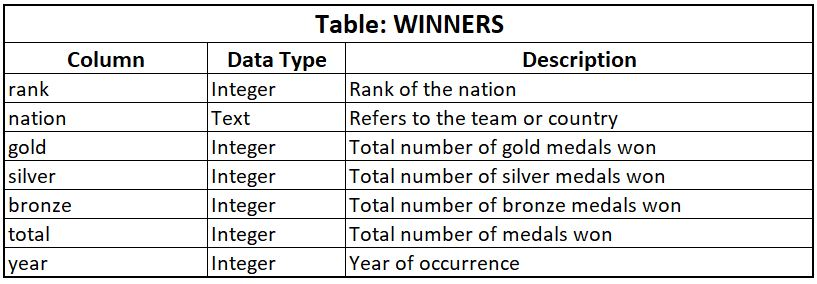

<center><b>Table #5. SPORTS Table Dictionary.</b></center>
<center>Snippet of the SPORTS table fromt he Olympics SQL database</center>


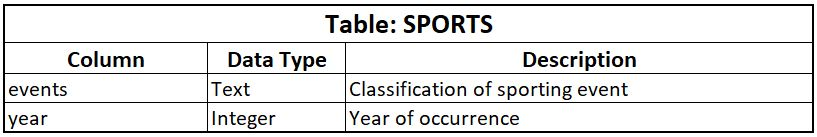

<center><b>Table #6. PARTICIPANTS Table Dictionary.</b></center>
<center>Snippet of the SPORTS table fromt he Olympics SQL database</center>


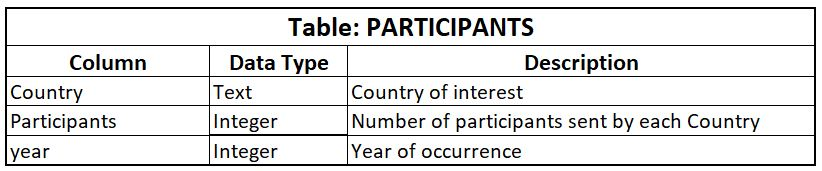

Before exploring and analyzing the data, the researchers filtered the data by removing duplicates, whitespaces, and unnecessary punctuations using Regex. 

### Exploration and Data Analysis

<b>a.</b>	The researchers wanted to investigate the countries where most Olympic games were held, and which countries won the most medal. Data visualization and basic statistics were implemented.



<b>b.</b>	Trend analysis on the Evolution of Olympics throughout the years.\
The researchers wanted to investigate various scenarios to describe the evolution of Olympic Games over the years. These scenarios were:
1.	Increase in number of participating nations,
2.	Increase in number of participating Athletes,
3.	Increase/Decrease in number of events,
4.	Increase in women participation,
5.	Participation Ratio of Men to Women

Analysis over these scenarios would depict the evolution of the Olympics over the years.


<b>c</b>. Correlation analysis on winners and the Economy 

The researchers used Pearson R correlation and computed the covariance matrix to analyze the correlations of the economic health indicators (nominal GDP, Gini index, and happiness index) and how they relate to the medal counts won by countries. The researchers limit the analysis in the year 2020.

# IV. Data Source

### Data Retrieval

The data was retrieved from https://olympics.com/ and from Olympics Wikipedia pages using the Wiki API. The data retrieved were mostly historical summer Olympics data from 1896 up to the present.

To supplement the analysis, the researchers considered researching on supplementary sourcers for Gini Coefficients and Index from the World Bank and World Happiness Index also from the World Bank.

Note: The notebook that the researchers used in scraping data from the abovementioned websites can be accessed [here](./all_tables_scraping.ipynb)

### Data Cleaning
While the data scraped from the above mentioned websites are not yet fully cleaned, the team invested time in cleaning up the data.


<b>Filtering rows.</b> Unnecessary information were removed from the scraped data. Examples of these data are duplicates, sponsors, ads.\
<b>Adding columns.</b> Some of the data extracted didn't have a specific column for year, mostly the data scraped had a full date. To analyze the yearly trend the team added a column year to improve the value of the analysis.


### Database Creation
The team processed the data to be viewed as a pandas dataframe and saved it to the SQL database as tables. This SQL database was the main source of the team's data for analysis.

# V. Data Exploration

In [4]:
print('\nTable #7. Basic statistics of the OLYMPICS table')
olympics, info, winners, sports, participants, gdp =utils.get_stats_olympic()


Table #7. Basic statistics of the OLYMPICS table


,Athletes,Teams,Events
count,28.000000,28.000000,28.000000
mean,5567.607143,98.785714,182.000000
std,3513.452584,68.570784,76.760329
min,241.000000,12.000000,43.000000
25%,2817.750000,42.250000,123.750000
50%,5165.000000,81.500000,159.500000
75%,8636.750000,161.500000,242.000000
max,11238.000000,207.000000,306.000000


***INFO:*** Data extracted from Wikipedia using API, the Info dataset consists of 266 rows. The table consists of information about the host city, how many nations/country participated, the gender split of participants, and the number of events and sports on each event.

In [5]:
print('\nTable #8. First 5 rows of Info table')
display(info.head(5))


Table #8. First 5 rows of Info table


,label,value,year
0,Host city,"Athens, Greece",1896
1,Nations,14[1],1896
2,Athletes,241 (all men)[2],1896
3,Events,43 in 9 sports,1896
4,Opening,6 April,1896


***WINNER:*** Data extracted from Wikipedia using API, the Winner dataset consists of 290 rows. The table consists of information number of medals each of the particapating countryabout the host city, how many nations/country participated, the gender split of participants, and the number of events and sports on each event.

In [6]:
print('\n\tTable #9. Basic statistics of WINNERS table')
display(winners[['rank','gold','silver','bronze','total']].describe())


	Table #9. Basic statistics of WINNERS table


,rank,gold,silver,bronze,total
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,5.489655,14.241379,12.403448,12.579310,39.224138
std,2.872413,13.923804,11.422947,10.428646,34.384878
min,1.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,6.000000,5.000000,5.000000,18.000000
50%,5.000000,9.000000,9.000000,10.000000,28.000000
75%,8.000000,16.000000,16.000000,16.750000,47.750000
max,10.000000,83.000000,78.000000,78.000000,234.000000


***SPORTS:*** Data extracted from Wikipedia using API, the Sports dataset consists of 1000 rows. The table stores the list of events/sports per year from 1896 to 2020.

In [7]:
print('\nTable #10. Basic statistics of PARTICIPANTS table')
sports.head()


Table #10. Basic statistics of PARTICIPANTS table


,events,year
0,Athletics,1896
1,Cycling,1896
2,Fencing,1896
3,Gymnastics,1896
4,Shooting,1896


***PARTICIPANTS:*** Data extracted from Wikipedia using API, the Participants dataset consists of 206 rows. The table stores the list of all participating countries and their corresponding participants for 2020 Tokyo Olympics. 

In [8]:
print('\nTable #11. Basic statistics of PARTICIPANTS table')
pd.DataFrame(participants['Participants'].describe())


Table #11. Basic statistics of PARTICIPANTS table


,Participants
count,206.000000
mean,55.004854
std,102.971391
min,2.000000
25%,5.000000
50%,11.000000
75%,49.500000
max,613.000000


***GDP:*** Data extracted from Wikipedia (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) using API, the Participants dataset consists of 213 rows. The table stores the list of all UN countries and their corresponding Gross domestic product (GDP) for the year 2020

In [9]:
print('\nTable #12. Basic statistics of PARTICIPANTS table')
gdp.describe()


Table #12. Basic statistics of PARTICIPANTS table


,country,region,2020_un_gdp*
count,213,213,213
unique,213,5,211
top,Trinidad and Tobago,Africa,"1,981"
freq,1,55,2


# VI. Results and Discussion

## VI.A. Analysis of the Host Countries

### Olympics Host Countries from 1896 to 2020

The summer Olympics occured 29 times since it started in 1896. In the graph above, United States became the host country of the summer Olympics for four (4) times. These hosted summer olympics were St. Louis1904, Los Angeles1932, Los Angeles1984, and Atlanta1996. The second most number of summer Olympics hosting was Great Britain. They hosted the London1908, London1948, and London2012. Currently, the 2020 Summer Olympics is hosted in Japan, and it is their second hosting from the previous Tokyo1964 summer olympics.

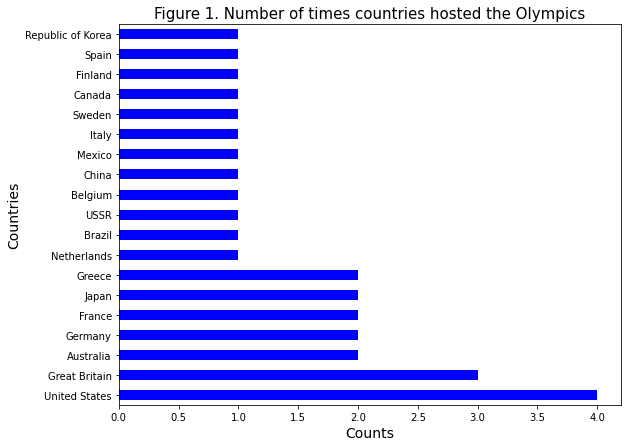

In [10]:
df_olympics = utils.get_continents_loc()
utils.visualize_hosts(df_olympics)


### Continents Where Most Games were Held

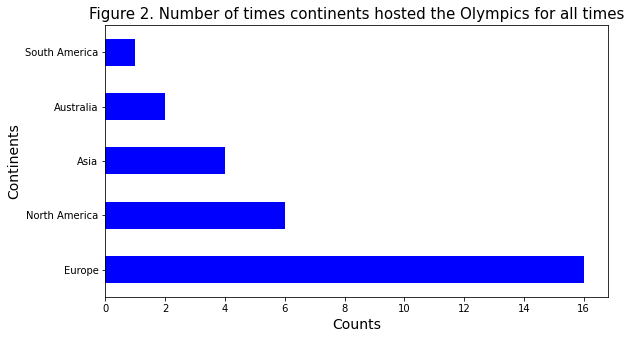

In [11]:
utils.visualize_continents(df_olympics, i=0, j=df_olympics.shape[0], title = \
    'Figure 2. Number of times continents hosted the Olympics for all times')

In the graph above, it can be observed that Europe has accounted for the most hosted summer Olympics with a whooping 16 hostings through out 29 gatherings since 1896. The researchers observed that since the Olympics was founded in Greece, which is in Europe, major countries hosted the event. [[2]](https://www.history.com/topics/sports/olympic-games) Since the summer Olympics was founded in the end of the 19th Century, 2 gatherings only took place and that is in 1896 and 1900 were the hosting continent for both is Europe.

As shown in the graph below, in the 20th Century (1901 - 2000), out of 22 summer Olympics, Europe hosted 12 gatherings. This is followed by North America with 6 hostings. The reason why the countries from these continents bid to host for the summer Olympics will be presented in the next section.

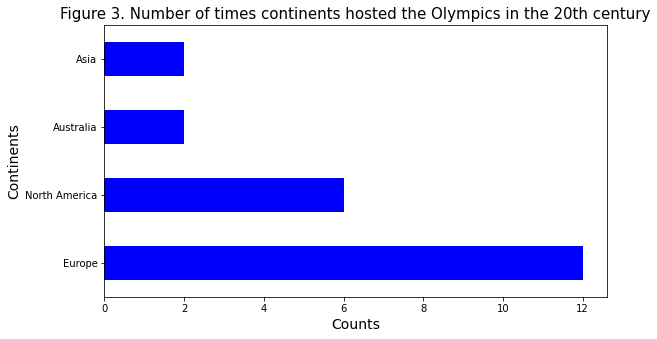

In [12]:
utils.visualize_continents(df_olympics, i=2, j=24, title ='Figure 3. Number'
        ' of times continents hosted the Olympics in the 20th century')


### Bidding to Host for the Summer Olympics

Why do Countries bid to host the summer Olympics? While the overall costs in hosting the Olympics is very high it can be justified by its effects. Firstly, the host country will enjoy an increase in valuable tourism, which can boost local economies. Secondly, it can increase a host country's global trade and stature. And lastly, Olympics create a sense of national pride. [[3]](https://www.procon.org/headlines/hosting-the-olympic-games-top-3-pros-and-cons/)

#### Early Olympics(1896 - 1980)

In the early years of the Olympics, from its founding year 1896 up to 1980, Europe has taken majority of the hostings with 13 counts. Next is North America with 4 hostings, 2 of which are from United States. It can be related to the good economic standing of these continents during these years and that they have benefitted with their hostings. [[4]](https://www.history.com/topics/early-20th-century-us) [[5]](https://historia-europa.ep.eu/en/permanent-exhibition/europe-global-power)

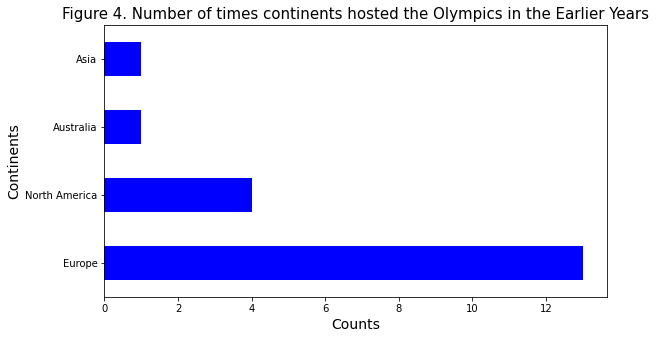

In [13]:
utils.visualize_continents(df_olympics, i=0, j=19, title ='Figure 4. Number'
        ' of times continents hosted the Olympics in the Earlier Years')

#### Last 10 Summer Olympics(1984 - 2020)

Filtering the last 10 Summer Olympics, it can be observed that majority of the continents hosting the summer Olympics are from Asia and Europe with 3 each. The researchers learned from the previous section that majority of the over-all summer Olympics host countries came from Europe. And over-all Asia only hosted 4 summer Olympics. It's interesting to see however, that Asia in the last 10 summer Olympics hosted 3. Which translates to 75% of Asia's hosting was from the last 10 summer Olympics.

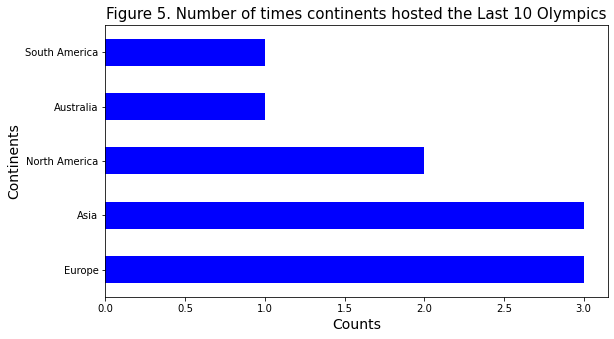

In [14]:
utils.visualize_continents(df_olympics, i=-10, j=df_olympics.shape[0], 
   title ='Figure 5. Number of times continents hosted the Last 10 Olympics')

#### 21st Century Summer Olympics(2004 - 2020)

Narrowing it down to the 21st Century or 5 summer Olympics, it is amazing to observe that Asia has hosted 2 gatherings.

This obervation may be linked also to the economic transformation of Asia. In the 1960s, Asia has been dubbed as the poorest continent, but it is now the economic powerhouse. In 2016, Asia accounted for 30% of world income, 40% of manufacturing, and one-third of world trade. [[6]](https://www.weforum.org/agenda/2019/10/how-asia-transformed-from-the-poorest-continent-in-the-world-into-a-global-economic-powerhouse)

The researchers can infer that the economic growth of Asia is a factor why it bids and hosts the summer Olympics. The justification of tourism, increase in global trade, and the sense of national pride may be the reasons why Asia is bidding to host the summer Olympics.

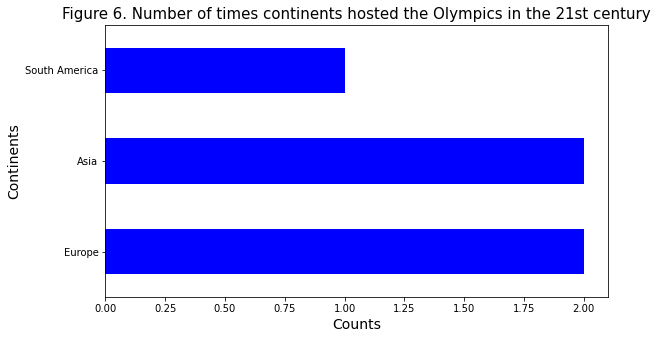

In [15]:
utils.visualize_continents(df_olympics, i=-5, j=df_olympics.shape[0], title=\
'Figure 6. Number of times continents hosted the Olympics in the 21st '
                    'century')

In [16]:
print('\nTable #13. Host countries in the 21st Century')
df_olympics[['Olympic Games', 'Country', 'Year', 'Continents']][-5:].\
                reset_index(drop=True)


Table #13. Host countries in the 21st Century


,Olympic Games,Country,Year,Continents
0,Athens2004,Greece,2004,Europe
1,Beijing2008,China,2008,Asia
2,London2012,Great Britain,2012,Europe
3,Rio2016,Brazil,2016,South America
4,Tokyo2020,Japan,2021,Asia


From Table 13, the 2 host countries from Asia are China and Japan, which were the Beijing 2008 summer Olympics and Tokyo 2020 summer Olympics. It is good to note that these 2 countries are 2nd and 3rd when in comes to the world's largest economies. [[7]](https://www.worldometers.info/gdp/gdp-by-country/)

The motivation on why a country bids to become the host of summer Olympics is more on its postive effects on that country's economy and pride for that country.

A deeper discussion on the econometrics will further be discussed in the next few sections. 

## VI.B. Trends on the Participating Teams or Countries

In [17]:
df_teams = utils.get_teams()

### Overall Trend

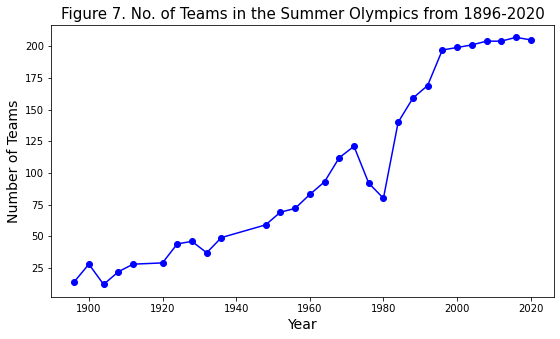

In [18]:
utils.visualize_teams(df_teams, i=0, j=df_teams.shape[0], title='Figure 7. '
                      'No. of Teams in the Summer Olympics from 1896-2020')

In [19]:
# Computing for the compounded annual growth rate of Teams
beg = int(df_teams['value'].iloc[0])
end = int(df_teams['value'].iloc[-1])
count = int(len(df_teams['value']))
cagr = (end/beg)**(1/count)-1
cagr = "{:.2f}%".format(cagr*100)
print('Compounded Annual Growth Rate of', cagr)

Compounded Annual Growth Rate of 9.70%


There is an overall uptrend in terms of number of teams that compete in the Olympics with a compounded annual growth rate of 9.7% since the games started with most (if not all) countries participating starting 1994. As of the 2020 games, the only UN-recognized country that is not represented in the Olympics is Vatican City[[8]](https://www.vaticanstate.va/it/stato-governo/note-generali/popolazione.html), presumably because of its small geographic size and tiny population size of 453 people (as of 2019). That is fewer than the whole Olympic Team sent by USA (613 members) [[9]](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiUnNv-oqHyAhWIGqYKHUFOAxIQFnoECBUQAw&url=https%3A%2F%2Fwww.nbcnewyork.com%2Fnews%2Fsports%2Ftokyo-summer-olympics%2Fhow-many-athletes-are-in-the-olympics-for-team-usa-by-the-numbers%2F3172363%2F&usg=AOvVaw3pJGYKoW4r-H2E018lNg8u).

There is also a large dip in participating teams in 1976 and 1980 which will be discussed in the portions below.

### Participation from Most Countries since 1980

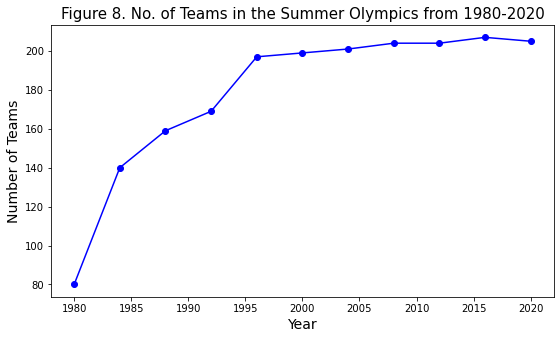

In [20]:
utils.visualize_teams(df_teams, i=18, j=df_teams.shape[0], title='Figure 8. '
                      'No. of Teams in the Summer Olympics from 1980-2020')


As the popularity of the Olympic Games pick-up, the researchers have seen participation from most countries since 1992 with relatively few additions from that date until 2020.

### Olympic Boycott: The 1976 and 1980 Games

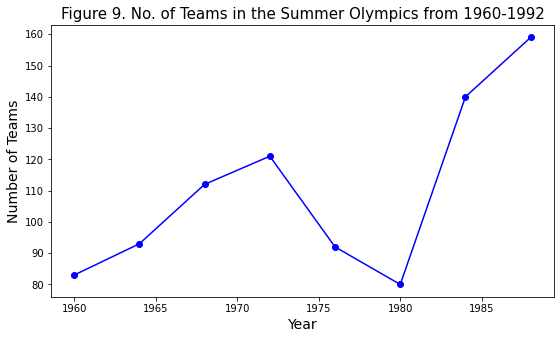

In [21]:
utils.visualize_teams(df_teams, i=13, j=21, title='Figure 9. '
                      'No. of Teams in the Summer Olympics from 1960-1992')

The 1976 Olympic Games has declined in terms of participants with 22 African nations, as well as Taiwan withdrawing from the games. Based on the official Olympics Website, the boycott was a sign of protest as the Olympic Committee allowed New Zealand’s Rugby team to compete that year, despite a clear violation of a trade agreement [[10]](https://olympics.com/en/olympic-games/montreal-1976). Separately, Taiwan also did not participate in the games as a boycott based on a political dispute with China. China did not allow Taiwan to use Taiwan’s official country name “Republic of China”[[11]](https://www.history.com/news/olympic-boycotts).

The 1980 Olympic Games showed the largest year-on-year decline in terms of participating teams as 65 countries did not participate. Non-participation of the teams had various reasons but the major reason cited is the protest of Team USA in the Afghanistan invasion by the Soviet Union[[12]](https://2001-2009.state.gov/r/pa/ho/time/qfp/104481.htm) brought about by the Soviet-Afghan War.


## VI.C. Trends on the Sporting Events

In [25]:
year_trends = utils.get_sports()

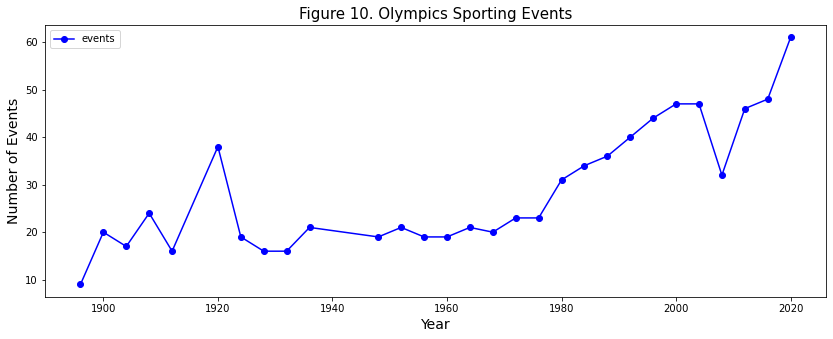

In [23]:
utils.visualize_sports(year_trends)

The chart above showed significant changes in the number of sporting events in 1920, 2008, and 2020.


After the cancellation of the 1916 Olympics due to World War I, the Olympics Games came back in ***1920*** with 22 more sporting events than in 1912. Based on the processed data scraped from Wikipedia, some added sporting events were Aquatics, Archery, Boxing, Equestrian Dressage
Equestrian Eventing, Field Hockey, Figure Skating, Korfball, Polo, Rugby Union, etc.

The ***Beijing Olympics of 2008*** had been fueled with controversies and concerns -- political, environmental, and security. The decrease of 12 in the number of sports in 2008 from 2004 Olympic games can be attributed to China hosting the event. Greco-Roman Wrestling, Beach Volleyball, Canoe Slalom, Mountain Biking, Show Jumping, Trampoline were some of the dropped events.[[13]](https://en.wikipedia.org/wiki/Concerns_and_controversies_at_the_2008_Summer_Olympics)




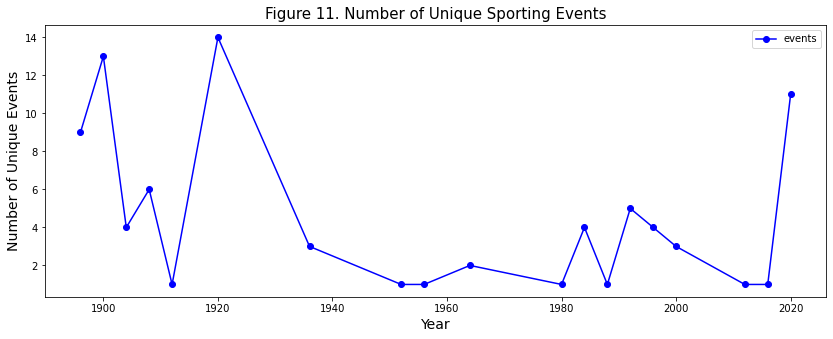

In [24]:
utils.create_sports_table()

The graph above shows the number of unique sporting events per applicable Olympics year. Similar to the trends of sporting events earlier, ***1920 and 2020*** have the highest upticks. The spike in the total number of sporting events in those years is connected to the number of newly added events.

Based on Wikipedia’s data, the Olympics started with 9 sports categories and grew to 21 in ***1900*** making it one of the years with a huge increase in the number of unique sporting events. Some of the new additions were Archery, Basque Pelota, Cricket, Croquet, Equestrian, Football, Golf, Polo, Rowing, Rugby Union, Sailing, Tug-of-war, etc. 


In [26]:
print('\nTable #14. Tokyo 2020 Olympics Unique Sporting Events')
utils.create_2020_events()


Table #14. Tokyo 2020 Olympics Unique Sporting Events


,events
0,Artistic swimming
1,Marathon swimming
2,3x3 Basketball
3,BMX freestyle
4,BMX racing
5,Kata
7,Kumite
8,Skateboarding
9,Sport climbing
10,Surfing


#### 2020 Tokyo Olympics

The COVID-19 pandemic caused the postponement of the 2020 Tokyo Olympics. The sports festival came back this year with 11 new sporting events: the major to debut were  Karate Kata, Karate Kumite,  Skateboarding, Sport Climbing, Surfing; while others were just sub-events of existing sports events such as 3x3 Basketball, Marathon Swimming, BMX Freestyle, as seen from the table above. 

Karate’s journey to the Olympics started in the 1970s. The closest it got to being included, prior to 2020, was in 2015 when it was shortlisted alongside the returning baseball and softball, and the new major events mentioned. Karate finally premiered in the country of its origin and was finally recognized as an Olympic sport.[[14]](https://en.wikipedia.org/wiki/Karate_at_the_Summer_Olympics) It can be assumed that Japan being country host has an impact in the held 122nd International Olympic Committee voting. 

## VI.D. Trends on the Participating Athletes

### Rise of the Olympians

Since the start of Olympics in 1890, the number of athletes participating in the leading international sporting event in the world has been increasing tremendously. It has been increasing in an average rate of **29%** year-on-year.

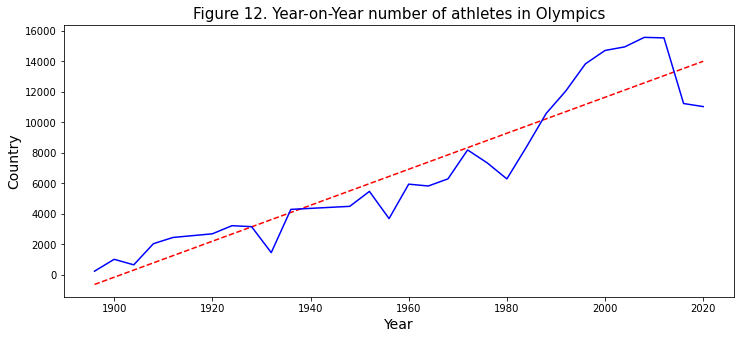

In [27]:
gender_df = utils.create_athletes()
utils.get_gender_trend(gender_df)

#### 2016 Rio Olympics: What happened?

In the 2016 Rio Olympics, there was a recorded decrease in the number of participants, from 15,554 athletes to 11,238 which is accounted for **27%** decrease. This may be due to the list of issues that might have implications for athletes, personnel, and spectators[[15]]( https://www.everycrsreport.com/reports/R44575.html). The outbreak of the mosquito-borne Zika virus in late 2015 was unforeseen. When an increase in the number of infants born with microcephaly was reported by the Brazilian health officials, a call for the cancellation of the Olympics was done. However, the U.S Centers for Disease Control and Prevention (CDC) and the World Health Organization (WHO) have indicated that the risk of transmission due to the Olympic games was low.

There are other risks reported for the 2016 Rio Olympics. These problems include:
1. Zika virus
2. Public safety threats
3. Security concerns
4. Environmental conditions

#### Further Decline in 2020 Tokyo Olympics

The number of athletes participating in the 2020 Tokyo Olympics declined, yet again, due to COVID Pandemic. From 15,544 athletes participating in 2012 then decreased to 11,238 in 2016, it further decreased to 11,037 on the 2020 Tokyo Olympics. This is due to the health risk and concerns to the athletes, coaches, and personnel.

A new wave of infections began in April in Japan. The government began vaccinating in February and only 22% of its population of about 126 million is fully vaccinated. With this, a number of bodies, and athletes voiced their concerns and called out for the cancellation of the sporting event.

### Rise of the Female Athletes

The rate of participation of women in the Olympic Games has been increasing since their first participation in 1900. In record, it has been increasing in an average rate of **43%** year-on-year.

In [28]:
# Mean percent difference of the number of women participating in the Olympics
gender_df.pct_change()['female'].iloc[2:].mean()

0.43106485194962746

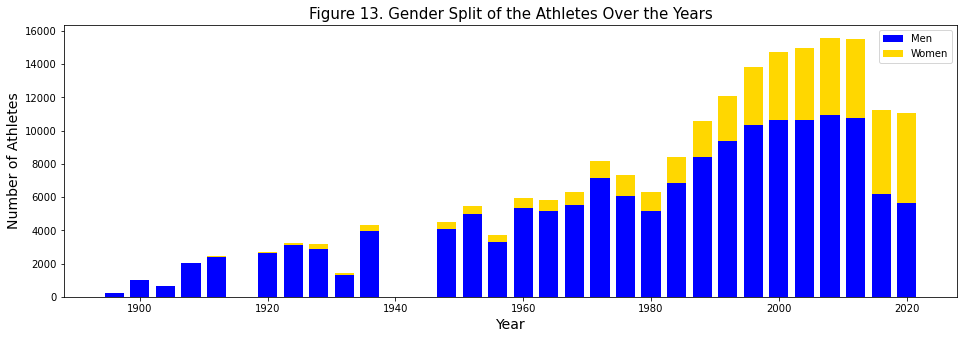

In [29]:
utils.visualize_gender(gender_df)

#### Gender Equality on 2020 Olympics

In 2020 Tokyo Olympics, an almost 50:50 split of male-to-female was achieved. With a total number of **5,386** out of 11,037 participating athletes, one can say that there has been a great progress made in terms of balancing the total number of athletes participating at the sporting event.

As it is one of the goals of IOC (International Olympic Committee), it provides essential tools and funding in order to achieve the Olympic Movement’s gender-equality goals. Also, in addition to 2020 Tokyo Olympics being the most gender-balanced sporting event in history, the IOC had also changed its rules to allow one male and one female athlete to jointly carry their flag during the Opening Ceremony.[[16]](https://olympics.com/ioc/gender-equality/) This is to send a powerful message to the world on the importance of gender equality both on and off the field.

## VI.E. Analysis on the Factors of Winning the Olympics

The researchers wanted to investigate the correlations between Economic health of a country and the chance of winning the olympic games. GDP nominal, GINI index, and Happiness index were used as economic indicators. The researchers limit the analysis in the year 2020.

#### GDP Nominal 2020 Feature

Nominal gross domestic product is gross domestic product (GDP) evaluated at current market prices. GDP is the monetary value of all the goods and services produced in a country. Nominal differs from real GDP in that it includes changes in prices due to inflation, which reflects the rate of price increases in an economy. [[17]](https://www.investopedia.com/terms/n/nominalgdp.asp)`

#### Gini Indices for per country

The Gini index, or Gini coefficient, is a measure of the distribution of income across a population developed by the Italian statistician Corrado Gini in 1912. It is often used as a gauge of economic inequality, measuring income distribution or, less commonly, wealth distribution among a population. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with 0 representing perfect equality and 1 representing perfect inequality. Values over 1 are theoretically possible due to negative income or wealth. [[18]](https://www.investopedia.com/terms/g/gini-index.asp)

#### World Happiness Index 2021 (2020 focused data)

The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. Our aim was two-fold, first to focus on the effects of COVID-19 on the structure and quality of people’s lives, and second to describe and evaluate how governments all over the world have dealt with the pandemic. In particular, the researchers try to explain why some countries have done so much better than others. [[19]](https://worldhappiness.report/)

#### Derived Winning Features

The researchers normalized the winnings in the olympics in terms of gold rate, conversion rate, and golden convert.
Gold rate refers to the number of gold medals over the total medal count, or the ratio of gold medals to Total Medals per country. Conversion rate is the ratio of athletes who were able to take home a medal to the total number of athletes sent to the Olympic event per country. Golden convert or golden conversion rate is the ratio of athletes who were able to take home a Gold Medal to the total number of athletes sent to the Olympic event per country.

In [30]:
print("\n\t\t\tTable #15. Top 10 2020 Olympic Winners with Gini, GDP, Happiness Indices")
df_winners = utils.get_winners()
df_winners


			Table #15. Top 10 2020 Olympic Winners with Gini, GDP, Happiness Indices


,rank,nation,gold,silver,bronze,total_medals,gdp_nominal_2020,gini_index,happiness_index,gold_rate,conversion_rate,golden_convert
0,1,United States,39,41,33,113,21433226,40.012903,6.940,0.345133,0.184339,0.063622
1,2,China,38,32,18,88,14342933,39.715385,5.124,0.431818,0.216749,0.093596
2,3,Japan,27,14,17,58,5082465,33.266667,5.871,0.465517,0.105072,0.048913
3,4,United Kingdom,22,21,22,65,2826441,34.400000,7.165,0.338462,0.172872,0.058511
4,5,Russia,20,28,23,71,1692930,39.829167,5.546,0.281690,0.213213,0.060060
5,6,Australia,17,7,22,46,1380207,33.420000,7.223,0.369565,0.096436,0.035639
6,7,Netherlands,10,12,14,36,3861123,30.404762,7.076,0.277778,0.084706,0.023529
7,8,France,10,12,11,33,907050,28.665000,7.449,0.303030,0.118705,0.035971
8,9,Germany,10,11,16,37,2003576,34.439130,6.387,0.270270,0.099462,0.026882
9,10,Italy,10,10,20,40,2715518,32.419048,6.664,0.250000,0.103896,0.025974


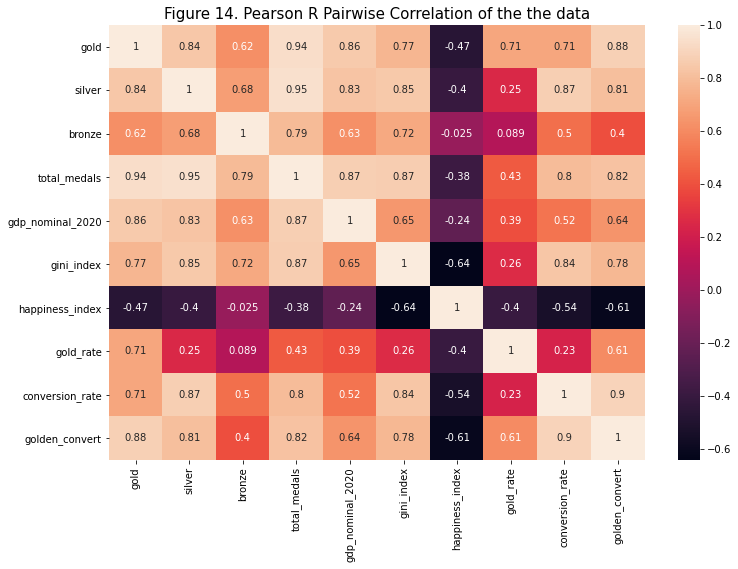

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df_winners.drop(['rank'], axis=1).corr(), annot=True)
plt.title('Figure 14. Pearson R Pairwise Correlation of the the data', fontsize=15);

It can be observed from the given data that there is a positive correlation between:

conversion rate, golden conversion rate, total medals, total gold medals and the economic indicators:

- GDP Nominal
- Gini Coefficients

But they all have a negative correlation with:
- Happiness index.

The researchers defined that a strong correlation when the coefficient between 2 features is n >= |0.5|. 

**GDP**
- Conversion Rate to GDP ~ 0.52
- Golden Conversion Rate to GDP ~ 0.64
- total medals to GDP ~ 0.87
- Gold to GDP ~ 0.85

**Gini Coefficient**
- Conversion Rate to Gini ~ 0.84
- Golden Conversion Rate to Gini ~ 0.78
- total medals to Gini ~ 0.87
- Gold to Gini ~ 0.77

**Happiness Index**
- Conversion Rate to HI ~ -0.54
- Golden Conversion Rate to HI ~ -0.61
- total medals to HI ~ -0.38
- Gold to HI ~ -0.47

The positive economic correlation infers that economic resources are a very strong necessity to be able to produce athletes who are extremely effective. The positively correlated Gini coefficients though strange indicates that countries with a wider wealth inequality do perform better in the olympics. The higher the Gini Coefficient is per country the higher the wealth gap between the rich and the poor, a hypothesis that can be drawn using Psychology is that people maybe working harder in countries with higher Gini Coefficients to be able to reach a higher wealth status compared to countries with lower Gini Coefficients. Athletes are possibly much strained in countries like this, but this should be supported with a relatively strong GDP or else the wealth gap would be pointless due to the lack of rewards.

The negative correlation with the Happiness Index is also a strange but interesting phenomenon. Using Psychology the researchers might be able to infer a hypothesis that countries with lower Happiness Index are less satisfied, therefore, people are much motivated to work harder and put more strain on themselves to be able to feel a sense of satisfaction. Countries with higher Happiness index may be satisfied already and does not feel the need to prove themselves through Winning events or showing off propaganda. 

Another possibility is that the data is heavily skewed by China thus giving the Happiness index a negative correlation. It is quite difficult to drop China as a data point as they are a major player in the olympics. The researchers may explore different approaches like isolating China from the other more closely ranked countries in the top 10.

In [32]:
print('\n\t\t\t\t\tTable #16. Covariance Matrix of the data ')
df_winners.drop(['rank', 'silver', 'bronze'], axis=1).cov().round(2)


					Table #16. Covariance Matrix of the data 


,gold,total_medals,gdp_nominal_2020,gini_index,happiness_index,gold_rate,conversion_rate,golden_convert
gold,127.34,2.769900e+02,6.563859e+07,34.81,-4.17,0.57,0.41,0.22
total_medals,276.99,6.840100e+02,1.551554e+08,90.54,-7.87,0.82,1.08,0.48
gdp_nominal_2020,65638588.14,1.551554e+08,4.605091e+13,17580407.91,-1270988.26,191123.35,182650.81,95562.52
gini_index,34.81,9.054000e+01,1.758041e+07,15.95,-2.02,0.08,0.17,0.07
happiness_index,-4.17,-7.870000e+00,-1.270988e+06,-2.02,0.62,-0.02,-0.02,-0.01
gold_rate,0.57,8.200000e-01,1.911234e+05,0.08,-0.02,0.01,0.00,0.00
conversion_rate,0.41,1.080000e+00,1.826508e+05,0.17,-0.02,0.00,0.00,0.00
golden_convert,0.22,4.800000e-01,9.556252e+04,0.07,-0.01,0.00,0.00,0.00


The researchers can also observe from the given data that there is a Positive Covariance between:

conversion rate, golden conversion rate, total medals, total gold medals and the economic indicators:

- GDP Nominal
- Gini Coefficients

This means that the stated success metrics and these economic indicators may be moving in the same Direction when plotted.

But they all have a negative Covariance with:

- Happiness index.

This means that the stated success metrics and Happiness index are moving in the opposite direction. 

Our Covariance Matrix shows exactly thesame behavior as our Correlational Heatmap albeit with different magnitudes.

### Ranking by Total Medals

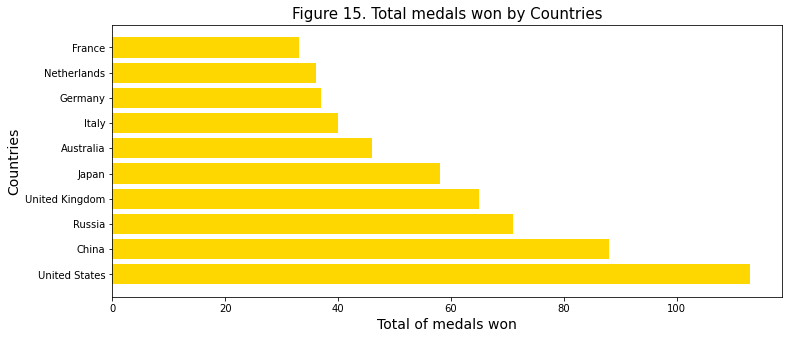

In [33]:
utils.visualize_medals(df_winners)

The United States Leads the rank when it comes to the Volume of Medals Taken home by its Athletes.

### Ranking by Gold Medals

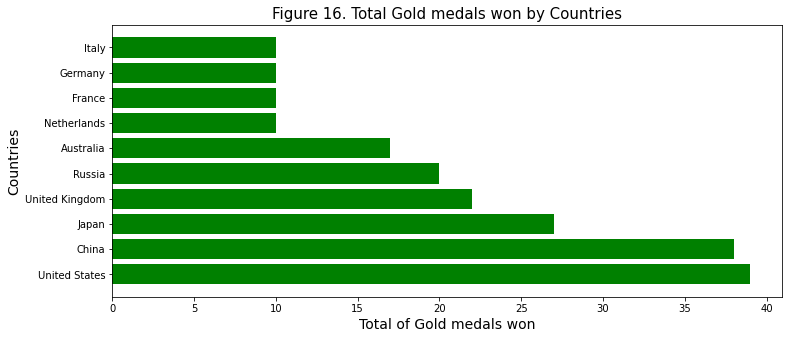

In [34]:
utils.visualize_gold_counts(df_winners)

The United States still Leads the rank when it comes to the Volume of Gold Medals Taken home by its Athletes.

### Ranking by Conversion Rate

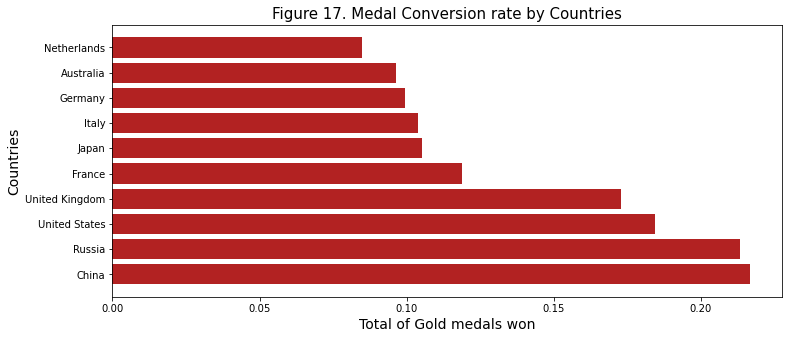

In [35]:
utils.visualize_rank_conversion(df_winners)

China leads the rank when it comes to Conversion Rate or the amount of medals taken home by its Athletes relative to the Amount of Athletes sent to the Olympics event.

This makes a lot of sense as Chinese Athletes are extremely pressured to take home Gold medals, there are lots of reports of Athletes being threatened if they cannot take home Gold medals. Athletes are still able to get lower medals than gold at least due to their extreme Training.[[20]](https://www.npr.org/templates/story/story.php?storyId=93697472)

### Ranking by Golden Conversion Rate

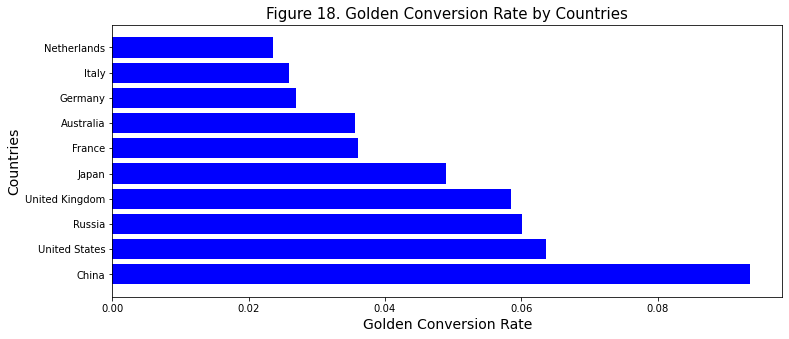

In [36]:
utils.visualize_golden_convert(df_winners)

This proves the pressure put upon Chinese athletes to really bring home a lot of Gold medals. Expectation on Chinese Athletes from fellow compatriots are very high and puts them in a lot of stress. [[20]](https://www.npr.org/templates/story/story.php?storyId=93697472)


**Key Takeaway**

- The US and China are the Top 1 and 2 Economies in the World in terms of Nominal GDP therefore high economic resources may attribute to higher performance in the Olympics. [[21]](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) (GDP Data Source.)

- China ranked 94th over 153 in the World Happiness index while the United States ranked 18th over 153. The correlational analysis may be skewed by China giving the Happiness index a negative correlation with our success metrics, but using a data frame without China merely decreased the correlational coefficient and still maintained a negative magnitude, therefore, there is merit to saying that there may or may not be a negative correlational with happiness and Olympic success rates. [[22]](https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world) (Happiness Index Data Source.)

- A wider wealth gap interestingly does somehow correlate to better Olympic performance. A Hypothesis that can be drawn using Psychology is that people may or may not working harder in countries with higher Gini Coefficients to be able to reach a higher wealth status compared to countries with lower Gini Coefficients.

- Our analysis still risks the chances of  `Ad hoc ergo propter hoc` (in economics) or correlation does not always mean causation. More data points will benefit our analysis to prove a stronger generalization.

- Better and cleaner estimates for the Gini Coefficients is more desired. There are lots of years where Data is unavailable per year and even countries without any statistical data, therefore more Data will benefit the Econometric Analysis. [[23]](https://data.worldbank.org/indicator/SI.POV.GINI) (Gini Data Source.)

# VII. Conclusion

In summary, the researchers have found out that Europe hosted most of the Olympic games during the 20th Century. Although during the 21st Century Asia hosted 2 out of 5 Summer Olympic Games (Main Olympic event), this behavior has been linked to the Economic transformation of Asia that is magnified during the 21st Century. From the paper it can be inferred that the motivation on why a country would bid to become the host of the Olympic events is more on its positive effects on that country's economy and a sense of national pride for that specific country, it is like saying hosting an Olympic event is a sort of “Prestige” or a very expensive investment with a positive externality.

Furthermore, since the very first Olympic event there is a positive linear trend in the number of teams and participants joining the Olympic games from 1896 until 2020 apart from 1976 and 1980 which were both boycotts due to political matters in those years related to the participants. The researchers have also found a positive linear trend in the amount of sporting events added since 1896 to 2020. It is also interesting to note that 1920 and 2020 both have the most count of unique sporting events recorded.

The researchers also found out that the number of athletes participating in the leading international sporting event in the world since 1896 has been increasing tremendously with an average rate of 29% year-on-year. Although this is not the case for the Rio 2016 and Tokyo 2020 Olympics which saw a decrease instead of an increase, the researchers were able to point out that the reasons for the decreases were both because of health and safety concerns, with the Zika virus problem in 2016 and various other safety reasons and the COVID-19 Pandemic in 2020. It is also very interesting to note that the number of Female athlete participation has been increasing on an average rate of 43% year-on-year. The gender-split also became more pronounced during the 21st century with the 2020 Tokyo Olympics achieving an astounding near 50:50 split.

Lastly, the researchers have also discovered interesting correlations between Athlete performance and essential Socio-economic indicators. Through the Pearson Correlational test with a supporting Covariance matrix analysis the researchers have discovered that Nominal GDP and the Gini Coefficient for wealth inequality had strong positive correlations (n >= 0.5) with key success metrics for Olympic performance e.g., total medal count, conversion/win rate etc. It is also very interesting to note that the World Happiness Index had a negative correlation with key success metrics for Olympic performance. Although the analysis may benefit better with more data and stronger hypothesis tests to be able to form a more generalized conclusion on the correlational and covariance analyses.

# VIII. Recommendation

### 1. Redefining an Olympic Sport

An extensive analysis of the International Olympic Committee’s criteria for an ‘Olympic sport’ is recommended to gain a deeper understanding of the sports, per se. This would provide insights into the evolution of Olympic sports, including the differences and the fusion of ancient or traditional sports and the mainstream or modern sports. Consequently, the insights on the feasibility of the inclusion of e-games in the list of sporting events may be covered.
Another area to explore further is the influence of the potential hosts and/or upcoming host country in the selection, evaluation, and voting process for the nominated sports. This arose from karate being introduced as a new sport category in the Tokyo 2020 Olympics, as mentioned in section VI.C. 

Exploring the trends and driving factors on dropping particular sporting events from the festival would also be interesting and may lead to a meaningful study. Its additional layer could be the insights on previously dropped sporting events being reintroduced after a certain period, which happened to baseball and softball that were dropped in 2008 but reintroduced in the Tokyo 2020 Olympics. [[24]](https://www.topendsports.com/events/summer/sports/index.htm)

### 2. New Host Countries

Interestingly, the countries who hosted Olympics were mostly affiliated with G-20 or the Group of 20. G-20 is a group of finance ministers and central bank governors from 19 of the world's largest economies, including those of many developing nations, along with the European Union. These countries include, Argentina, Australia, Brazil, China, India, Indonesia, Mexico, Russia, Saudi Arabia, South Africa, South Korea, Turkey, France, Germany, Italy, Japan, the United States, the United Kingdom, and Canada. [[25]](https://www.investopedia.com/terms/g/g-20.asp)

It is recommended to further study and understand if the hosting of Olympics really boost a country’s economy. This further study will help understand if capable countries outside G-20 can bid to host the Olympics to further improve their economic standing.

### 3. Understanding the Economy

While the researchers touched on the economic analysis of the Olympics, the data considered was just for 2020. A deeper analysis considering past data to understand more on the econometrics of Olympics is recommended. Further study will answer the question if GDP is a good predictor of success or winnings (medal shares and point shares). 

To understand if there is an economic effect in the Olympics winning chances, it is recommended to further expand the study. This is to include the analysis of each Country’s Gini Index. The researchers considered analyzing the Gini Index, but this is only for 2020. It is recommended therefore, to study if Gini Index is a factor in winning the Olympics. A better and cleaner estimate for the Gini Coefficients is more desired for the further study. It is also recommended to understand the happiness index of people in each country. This is to recognize if emotion and satisfaction play a role in the success of a country’s Olympic bid. 
 
If the economic effect is well understood and further researched, this can be used as a predictor of success on a country’s Olympic gold medal bid.

### 4. Physical Features of Participants

The number of athletes, events, and nations has grown dramatically since 1896. Female participation also increased dramatically, and there is an almost 50:50 split of male-to-female observed in the 2020 Tokyo Olympics. Since the Olympic motto “Citius, Altius, Fortius” means “Faster, Higher, Stronger”, it would only be fitting to do further research on the physical features of the participants (i.e., height, weight) and if it affects the win rate in the Olympics. It would be good to know the trends of the athletes’ physical features over time if there are any variations especially since the inclusion of art competitions in some Olympic seasons. [[26]](https://www.smithsonianmag.com/arts-culture/when-the-olympics-gave-out-medals-for-art-6878965/)

Understanding the trend of the athletes’ physical features will be beneficial for countries in choosing their right delegates for the Olympics. To answer the question, what sports require taller and heavier athletes? Are there sports that the athletes have become smaller?


# References

[1] International Olympic Committee. (Accessed 08 August 2021). *Welcome to the Ancient Olympic Games*.https://olympics.com/ioc/ancient-olympic-games.

[2] H History. (21 July 2021). *The Olympic Games*. https://www.history.com/topics/sports/olympic-games.

[3] ProCon Encyclopaedia Britannica. (07 August 2021). *Hosting the Olympic Games – Top 3 Pros and Cons*. https://www.procon.org/headlines/hosting-the-olympic-games-top-3-pros-and-cons/.

[4] H History. (Accessed 08 August 2021). *Early 20th Century US*. https://www.history.com/topics/early-20th-century-us.

[5] House of European History. (Accessed 08 August 2021). *Europe: A Global Power*. https://historia-europa.ep.eu/en/permanent-exhibition/europe-global-power. 

[6] World Economic Forum. (25 October 2019). *How can we explain Asia’s spectacular economic rise?*. https://www.weforum.org/agenda/2019/10/how-asia-transformed-from-the-poorest-continent-in-the-world-into-a-global-economic-powerhouse.

[7] Worldometer. (Accessed 08 August 2021). *GDP by Country*. https://www.worldometers.info/gdp/gdp-by-country/.

[8] Stato Della Citta Del Vaticano. (03 July 2018). *Population*. https://www.vaticanstate.va/it/stato-governo/note-generali/popolazione.html.

[9] NBC New York. (24 July 2021). *How Many Athletes Are in the Olympics for Team USA? By the Numbers*. https://www.nbcnewyork.com/news/sports/tokyo-summer-olympics/how-many-athletes-are-in-the-olympics-for-team-usa-by-the-numbers/3172363/.

[10] International Olympic Committee. (Accessed 08 August 2021). *Montreal 1976*. https://olympics.com/en/olympic-games/montreal-1976.

[11] H History. (26 July 2021). *6 Times the Olympics Were Boycotted*. https://www.history.com/news/olympic-boycotts. 

[12] U.S. Department of State. (Accessed 08 August 2021). *The Olympic Boycott, 1980*. https://2001-2009.state.gov/r/pa/ho/time/qfp/104481.htm.

[13] Wikipedia. (21 July 2021). *Concerns and controversies at the 2008 Summer Olympics*. https://en.wikipedia.org/wiki/Concerns_and_controversies_at_the_2008_Summer_Olympics.

[14] Wikipedia. (07 August 2021). *Karate at the Summer Olympics*. https://en.wikipedia.org/wiki/Karate_at_the_Summer_Olympics.

[15] EveryCRSReport. (08 August 2016). *The 2016 Olympic Games: Health, Security, Environmental, and Doping Issues*. https://www.everycrsreport.com/reports/R44575.html. 

[16] International Olympic Committee. (Accessed 08 August 2021). *Gender Equality in Sport*. https://olympics.com/ioc/gender-equality/.

[17] Investopedia. (19 December 2020). *Nominal Gross Domestic Product*. https://www.investopedia.com/terms/n/nominalgdp.asp.

[18] Investopedia. (28 April 2021). *Gini Index*. https://www.investopedia.com/terms/g/gini-index.asp.

[19] World Happiness Report. (Accessed 08 August 2021). *World Happiness Report 2021*. https://worldhappiness.report/. 

[20] NPR. (18 August 2008). *Chinese Athletes Under Pressure To Win Gold*. https://www.npr.org/templates/story/story.php?storyId=93697472.

[21] Wikipedia. (01 August 2021). *List of countries by GDP (nominal)*. https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal).

[22] World Population Review. (Accessed 08 August 2021). *Happiest Countries In The World 2021*. https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world.

[23] The World Bank. (Accessed 08 August 2021). *Gini Index (World Bank estimate)*. https://data.worldbank.org/indicator/SI.POV.GINI.

[24] Topend Sports. (Accessed 09 August 2021).*Sports of the Olympic Games*. https://www.topendsports.com/events/summer/sports/index.htm.

[25] Investopedia. (28 December 2020). *Group of 20 (G-20)*. https://www.investopedia.com/terms/g/g-20.asp.

[26] Smithsonian Mag. (24 July 2021). *When the Olympics Gave Out Medals for Art*. https://www.smithsonianmag.com/arts-culture/when-the-olympics-gave-out-medals-for-art-6878965/.